In [1]:
import pandas as pd

In [2]:
check= pd.read_csv('image_table.csv')

In [3]:
check.groupby('name').count().sort_values('page_image')

,page_image,title,page_link
name,,,
교환학생,1,1,1
다름이 아니라,1,1,1
시에라,1,1,1
길티액스,1,1,1
약초마을 연쇄살초사건,1,1,1
...,...,...,...
사상최강,20,20,20
사막에 핀 달,20,20,20
사람의 조각,20,20,20


<AxesSubplot:ylabel='Frequency'>

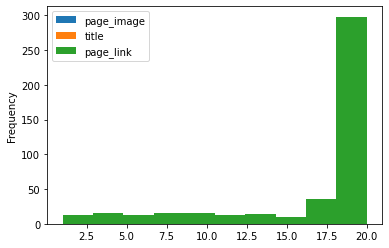

In [4]:
check.groupby('name').count().plot.hist()

In [5]:
checklist= check.groupby('name').count()['title'].loc[check.groupby('name').count()['title']<20].index.values

In [6]:
len(checklist)

154

In [7]:
i=0

In [8]:
check.loc[check['name']==checklist[i]]


,name,page_image,title,page_link
6376,2-3승강장,https://shared-comic.pstatic.net/thumb/webtoon...,19화,https://comic.naver.com/webtoon/detail?titleId...
6377,2-3승강장,https://shared-comic.pstatic.net/thumb/webtoon...,18화,https://comic.naver.com/webtoon/detail?titleId...
6378,2-3승강장,https://shared-comic.pstatic.net/thumb/webtoon...,17화,https://comic.naver.com/webtoon/detail?titleId...
6379,2-3승강장,https://shared-comic.pstatic.net/thumb/webtoon...,16화,https://comic.naver.com/webtoon/detail?titleId...
6380,2-3승강장,https://shared-comic.pstatic.net/thumb/webtoon...,15화,https://comic.naver.com/webtoon/detail?titleId...
6381,2-3승강장,https://shared-comic.pstatic.net/thumb/webtoon...,14화,https://comic.naver.com/webtoon/detail?titleId...
6382,2-3승강장,https://shared-comic.pstatic.net/thumb/webtoon...,13화,https://comic.naver.com/webtoon/detail?titleId...
6383,2-3승강장,https://shared-comic.pstatic.net/thumb/webtoon...,12화,https://comic.naver.com/webtoon/detail?titleId...
6384,2-3승강장,https://shared-comic.pstatic.net/thumb/webtoon...,11화,https://comic.naver.com/webtoon/detail?titleId...
6385,2-3승강장,https://shared-comic.pstatic.net/thumb/webtoon...,10화,https://comic.naver.com/webtoon/detail?titleId...


In [9]:
i+=1

In [10]:
# 154개 언제 다보냐 그냥 새로 가져오자
from urllib.request import Request, urlopen
from bs4 import BeautifulSoup
import numpy as np
import pandas as pd

In [11]:
order = pd.read_csv('./order_table.csv')[['name', 'link']]

In [12]:
# 2일 연재, 3일연재 중복제거
order.drop_duplicates('name', inplace=True)

In [13]:
order.link

0      https://comic.naver.com/webtoon/list?titleId=7...
1      https://comic.naver.com/webtoon/list?titleId=1...
2      https://comic.naver.com/webtoon/list?titleId=6...
3      https://comic.naver.com/webtoon/list?titleId=6...
4      https://comic.naver.com/webtoon/list?titleId=7...
                             ...                        
450    https://comic.naver.com/webtoon/list?titleId=7...
451    https://comic.naver.com/webtoon/list?titleId=7...
452    https://comic.naver.com/webtoon/list?titleId=7...
453    https://comic.naver.com/webtoon/list?titleId=7...
454    https://comic.naver.com/webtoon/list?titleId=7...
Name: link, Length: 443, dtype: object

In [49]:
before = order.name.values

In [14]:
order['titleId'] = order['link'].str.split('?',expand = True)[1].str.split('=',expand = True)[1].str.split('&',expand = True)[0]

In [15]:
titleId = order['titleId'].values

In [31]:
len(titleId)

443

In [42]:
titleId

array(['758037', '183559', '648419', '602910', '774863', '728750',
       '733074', '654774', '749632', '739115', '769317', '759940',
       '703849', '768536', '709731', '730174', '21815', '758666',
       '752414', '772725', '741891', '716857', '774703', '769663',
       '734574', '776541', '597478', '768534', '738809', '770656',
       '758671', '774302', '687915', '761461', '772734', '767919',
       '744320', '772243', '766575', '758667', '752350', '762237',
       '752413', '752530', '774040', '745654', '765776', '715206',
       '756140', '740132', '750493', '761553', '759420', '764041',
       '734918', '767979', '761463', '769801', '756790', '764480',
       '764623', '754872', '770590', '703846', '773459', '759925',
       '743139', '738487', '730656', '738174', '702608', '683496',
       '778963', '772401', '719508', '775721', '753856', '757904',
       '774358', '721433', '755694', '698918', '711422', '771044',
       '616239', '754875', '766648', '723046', '776093', '76515

In [17]:
titleId[0:1]

array(['758037'], dtype=object)

In [180]:
order.loc[order.name=='신의 탑']

,name,link,titleId
1,신의 탑,https://comic.naver.com/webtoon/list?titleId=1...,183559


In [65]:
checking=776096

In [85]:
def create_new_url(link):
    return 'https://comic.naver.com/webtoon/list?titleId='+str(link)+'&page=1'

def create_old_url(link):
    return 'https://comic.naver.com/webtoon/list?titleId='+str(link)+'&page=999'

In [86]:
create_new_url(checking)

'https://comic.naver.com/webtoon/list?titleId=776096&page=1'

In [92]:
len(soup.select('#content > table')[0].find_all('a'))//2

10

In [97]:
titleId[0]

'758037'

In [ ]:
#for link in titleId[0:1]: 입력, 루프문 테스트

In [105]:
# 최신 10화 가져오기(제일 최근에 나온화는 뺴고)
for link in titleId[0:1]:
    #크롤링
    url = create_new_url(link)
    request = Request(url)
    request.get_method = lambda: 'GET'
    response_body = urlopen(request).read()
    soup = BeautifulSoup(response_body, 'html.parser')
    rough = soup.select('#content > div.comicinfo')
    #가져올 변수 초기화
    name=[]
    page_image=[]
    title=[]
    page_link=[]
    count = 0
    
    # 크롤링으로 표의 줄 갯수 확인해서 반복
    # AD 배너라면 PASS
    while 1:
        print(count)
        # 1페이지가 10개 이하일때(나온 웹툰이 10화 이하라면, a태그 반복때문에 나누기 2해줘야함)
        if len(soup.select('#content > table')[0].find_all('a'))//2 < 10:
            # 테이블 줄수만큼 반복(a태그 x2)
            for i in np.arange(len(soup.select('#content > table')[0].find_all('a'))//2):
                print(count, '10 이하')
                if soup.select('#content > table')[0].find_all('a')[-2-i*2].img.get('alt')=='AD 배너':
                    print(count, 'pass 중')
                    pass
                else:
                    name.append(rough[0].img.get('title'))
                    page_image.append(soup.select('#content > table')[0].find_all('a')[-2-i*2].img.get('src'))
                    title.append(soup.select('#content > table')[0].find_all('a')[-2-i*2].img.get('alt'))
                    page_link.append('https://comic.naver.com'+soup.select('#content > table')[0].find_all('a')[-2-i*2].get('href'))
                    count =1+count
                    print(count, 'append 중')

            #다음 페이지가 없으면 정지
            if len(soup.select('#content > div.paginate > div')[0].find_all('a', class_='page'))==0:
                break
            #에러메세지(생각못한 구조)
            else:
                print("1페이지가 10개 이하 이고, 다음 페이지가 있는 작품 :",rough[0].img.get('title'))
        # 1페이지가 10개 이상(보통 광고하나 껴서 21개일때가 많고, 다른 광고껴있으면 22개정도가 최대인듯, 그래서 뒤쪽 태그부터 가져오기)
        else :
            # 1페이지에서 9개 가져오기
            for i in np.arange(9):
                print(count, '10 이상')

                if soup.select('#content > table')[0].find_all('a')[-2-i*2].img.get('alt')=='AD 배너':
                    print(count, 'pass 중')
                    pass
                else:
                    name.append(rough[0].img.get('title'))
                    page_image.append(soup.select('#content > table')[0].find_all('a')[-2-i*2].img.get('src'))
                    title.append(soup.select('#content > table')[0].find_all('a')[-2-i*2].img.get('alt'))
                    page_link.append('https://comic.naver.com'+soup.select('#content > table')[0].find_all('a')[-2-i*2].get('href'))
                    count =1+count
                    print(count, 'append 중')
            # 2페이지에서 1개 가져오기
            url2 = 'https://comic.naver.com'+soup.select('#content > div.paginate > div')[0].find_all('a', class_='page')[0].get('href')
            request = Request(url2)
            request.get_method = lambda: 'GET'
            response_body = urlopen(request).read()
            soup = BeautifulSoup(response_body, 'html.parser')
            for i in np.arange(len(soup.select('#content > table')[0].find_all('a'))//2):
                
                if count==10:
                    print(count, '2page 끝')
                    break

                name.append(rough[0].img.get('title'))
                page_image.append(soup.select('#content > table')[0].find_all('a')[-2-(len(soup.select('#content > table')[0].find_all('a'))//2-1-i)*2].img.get('src'))
                title.append(soup.select('#content > table')[0].find_all('a')[-2-(len(soup.select('#content > table')[0].find_all('a'))//2-1-i)*2].img.get('alt'))
                page_link.append('https://comic.naver.com'+soup.select('#content > table')[0].find_all('a')[-2-(len(soup.select('#content > table')[0].find_all('a'))//2-1-i)*2].get('href'))
                count = 1+count
                print(count, '2page 중')


        # 찾은 정보 데이터 프레임 안에 넣기
        image_table_temp = pd.DataFrame(name).rename(columns={0:'name'})
        image_table_temp['page_image'] = page_image
        image_table_temp['title'] = title
        image_table_temp['page_link'] = page_link
        if count==10:
            print('데이터 프레임 안에 넣음')
            break
    

# 오래된거 10화 가져오기

0
0 10 이상
1 append 중
1 10 이상
2 append 중
2 10 이상
3 append 중
3 10 이상
4 append 중
4 10 이상
5 append 중
5 10 이상
6 append 중
6 10 이상
7 append 중
7 10 이상
8 append 중
8 10 이상
9 append 중
10 2page 중
10 2page 끝
데이터 프레임 안에 넣음


In [109]:
soup.select('#content > table')[0].find_all('a')

[<a href="#" onclick="callWebAdBannerClick('/api/stat/gameBanner?type=CLICK&amp;target=ARTICLE_LIST&amp;bannerId=716', 'https://dhaj.adj.st?adj_t=52e6w9r&amp;adj_deep_link=play%3A%2F%2Fyumicell&amp;adj_campaign=housebanner&amp;adj_adgroup=molist&amp;adj_fallback=https%3A%2F%2Fgame.naver.com%2Flounge%2FYumis_Cells_the_Puzzle%2Fhome&amp;adj_redirect_macos=https%3A%2F%2Fgame.naver.com%2Flounge%2FYumis_Cells_the_Puzzle%2Fhome');nclk_v2(event,'lst.adbanner');return false;">
 <img alt="AD 배너" height="44" src="https://naverwebtoon-phinf.pstatic.net/20210903_109/16306594776506n1iE_PNG/upload_6809476423605085335.PNG" width="694"/>
 </a>,
 <a href="https://series.naver.com/comic/detail.nhn?originalProductId=440127" onclick="nclk_v2(event,'lst.gostore','776096');" target="_blank">
 <em class="ico_store2">NAVER 만화</em>완결까지 정주행!</a>,
 <a href="/webtoon/detail?titleId=776096&amp;no=9&amp;weekday=sun" onclick="nclk_v2(event,'lst.img','776096','9')">
 <img alt="9화" height="41" onerror="this.src='https

In [188]:
-2-(len(soup.select('#content > table')[0].find_all('a'))//2-1-i)*2

-20

In [201]:
# 최신 10화 가져오기(제일 최근에 나온화는 뺴고)
for link in titleId:
    #크롤링
    url = create_new_url(link)
    request = Request(url)
    request.get_method = lambda: 'GET'
    response_body = urlopen(request).read()
    soup = BeautifulSoup(response_body, 'html.parser')
    rough = soup.select('#content > div.comicinfo')
    #가져올 변수 초기화
    name=[]
    page_image=[]
    title=[]
    page_link=[]
    count = 0
    
    # 크롤링으로 표의 줄 갯수 확인해서 반복
    # AD 배너라면 위에 다왔으니 break
    while 1:
        # 1페이지가 10개 이하일때(나온 웹툰이 10화 이하라면, a태그 반복때문에 나누기 2해줘야함)
        if len(soup.select('#content > table')[0].find_all('a'))//2 < 10:
            # 테이블 줄수만큼 반복(a태그 x2)
            for i in np.arange(len(soup.select('#content > table')[0].find_all('a'))//2):
                if soup.select('#content > table')[0].find_all('a')[-2-i*2].img.get('alt')=='AD 배너':
                    break
                else:
                    name.append(rough[0].img.get('title'))
                    page_image.append(soup.select('#content > table')[0].find_all('a')[-2-i*2].img.get('src'))
                    title.append(soup.select('#content > table')[0].find_all('a')[-2-i*2].img.get('alt'))
                    page_link.append('https://comic.naver.com'+soup.select('#content > table')[0].find_all('a')[-2-i*2].get('href'))
                    count =1+count

            #다음 페이지가 없으면 정지
            if len(soup.select('#content > div.paginate > div')[0].find_all('a', class_='page'))==0:
                break
            #에러메세지(생각못한 구조)
            else:
                print("1페이지가 10개 이하 이고, 다음 페이지가 있는 작품 :",rough[0].img.get('title'))
        # 1페이지가 10개 이상(보통 광고하나 껴서 21개일때가 많고, 다른 광고껴있으면 22개정도가 최대인듯, 그래서 뒤쪽 태그부터 가져오기)
        else :
            # 1페이지에서 9개 가져오기
            for i in np.arange(9)+1:
                print('url',soup.select('#content > table')[0].find_all('a')[-(len(soup.select('#content > table')[0].find_all('a'))//2-1-i)*2].img.get('alt'), i)
                if soup.select('#content > table')[0].find_all('a')[-(len(soup.select('#content > table')[0].find_all('a'))//2-1-i)*2].img.get('alt')=='AD 배너':
                    pass
                else:
                    name.append(rough[0].img.get('title'))
                    page_image.append(soup.select('#content > table')[0].find_all('a')[-(len(soup.select('#content > table')[0].find_all('a'))//2-1-i)*2].img.get('src'))
                    title.append(soup.select('#content > table')[0].find_all('a')[-(len(soup.select('#content > table')[0].find_all('a'))//2-1-i)*2].img.get('alt'))
                    page_link.append('https://comic.naver.com'+soup.select('#content > table')[0].find_all('a')[-(len(soup.select('#content > table')[0].find_all('a'))//2-1-i)*2].get('href'))
                    count =1+count
            # 2페이지에서 1개 가져오기
            if len(soup.select('#content > div.paginate > div')[0].find_all('a', class_='page'))==0:
                break
            url2 = 'https://comic.naver.com'+soup.select('#content > div.paginate > div')[0].find_all('a', class_='page')[0].get('href')
            request = Request(url2)
            request.get_method = lambda: 'GET'
            response_body = urlopen(request).read()
            soup = BeautifulSoup(response_body, 'html.parser')
            for i in np.arange(len(soup.select('#content > table')[0].find_all('a'))//2):
                print('url2',soup.select('#content > table')[0].find_all('a')[-2-(len(soup.select('#content > table')[0].find_all('a'))//2-1-i)*2].img.get('alt'), i)
                if count==10:
                    break
                if soup.select('#content > table')[0].find_all('a')[-2-(len(soup.select('#content > table')[0].find_all('a'))//2-1-i)*2].img.get('alt')=='AD 배너':
                    pass
                else:
                    name.append(rough[0].img.get('title'))
                    page_image.append(soup.select('#content > table')[0].find_all('a')[-2-(len(soup.select('#content > table')[0].find_all('a'))//2-1-i)*2].img.get('src'))
                    title.append(soup.select('#content > table')[0].find_all('a')[-2-(len(soup.select('#content > table')[0].find_all('a'))//2-1-i)*2].img.get('alt'))
                    page_link.append('https://comic.naver.com'+soup.select('#content > table')[0].find_all('a')[-2-(len(soup.select('#content > table')[0].find_all('a'))//2-1-i)*2].get('href'))
                    count = 1+count
            if count==10:
                break
    if count ==9:
        name.pop()
        title.pop()
        page_link.pop()
        page_image.pop()
    # 찾은 정보 데이터 프레임 안에 넣기
    image_table_temp = pd.DataFrame(name).rename(columns={0:'name'})
    image_table_temp['page_image'] = page_image
    image_table_temp['title'] = title
    image_table_temp['page_link'] = page_link
    if link == titleId[0]:
        image_table = image_table_temp

    else:
        image_table = pd.concat([image_table,image_table_temp], axis=0)
    print(count, name[0])
    # 오래된거 10화 가져오기
    if count ==10:
        #크롤링
        url = create_old_url(link)
        request = Request(url)
        request.get_method = lambda: 'GET'
        response_body = urlopen(request).read()
        soup = BeautifulSoup(response_body, 'html.parser')
        rough = soup.select('#content > div.comicinfo')
        #가져올 변수 초기화
        name=[]
        page_image=[]
        title=[]
        page_link=[]
        count = 0
        
        # 크롤링으로 표의 줄 갯수 확인해서 반복
        # AD 배너라면 PASS
        while 1:
        # 마지막 페이지에서 가져오기
            for i in np.arange(len(soup.select('#content > table')[0].find_all('a'))//2):
                if soup.select('#content > table')[0].find_all('a')[-2-i*2].img.get('alt')=='AD 배너':
                    pass
                else:
                    name.append(rough[0].img.get('title'))
                    page_image.append(soup.select('#content > table')[0].find_all('a')[-2-i*2].img.get('src'))
                    title.append(soup.select('#content > table')[0].find_all('a')[-2-i*2].img.get('alt'))
                    page_link.append('https://comic.naver.com'+soup.select('#content > table')[0].find_all('a')[-2-i*2].get('href'))
                    count =1+count
            # 마지막에서 앞의 페이지에서 가져오기
            url2 = 'https://comic.naver.com'+soup.select('#content > div.paginate > div')[0].find_all('a', class_='page')[-1].get('href')
            request = Request(url2)
            request.get_method = lambda: 'GET'
            response_body = urlopen(request).read()
            soup = BeautifulSoup(response_body, 'html.parser')
            for i in np.arange(len(soup.select('#content > table')[0].find_all('a'))//2):
                if count==10:
                    break
                name.append(rough[0].img.get('title'))
                page_image.append(soup.select('#content > table')[0].find_all('a')[-2-i*2].img.get('src'))
                title.append(soup.select('#content > table')[0].find_all('a')[-2-i*2].img.get('alt'))
                page_link.append('https://comic.naver.com'+soup.select('#content > table')[0].find_all('a')[-2-i*2].get('href'))
                count = 1+count
            if count==10:
                break

        # 찾은 정보 데이터 프레임 안에 넣기
        image_table_temp = pd.DataFrame(name).rename(columns={0:'name'})
        image_table_temp['page_image'] = page_image
        image_table_temp['title'] = title
        image_table_temp['page_link'] = page_link
        image_table = pd.concat([image_table,image_table_temp], axis=0)
    else:
        print('10화 이하 웹툰입니다.', name[0])
    

url 3부 85화 1
url 3부 84화 2
url 3부 83화 3
url 3부 82화 4
url 3부 81화 5
url 3부 80화 6
url 3부 79화 7
url 3부 78화 8
url 3부 77화 9
url2 AD 배너 0
url2 3부 76화 1
url2 3부 75화 2
10 신의 탑


In [193]:
url2

'https://comic.naver.com/webtoon/list?titleId=183559&page=2'

In [195]:
soup.select('#content > table')[0].find_all('a')[-(len(soup.select('#content > table')[0].find_all('a'))//2-1-i)*2].img.get('alt')

'3부 75화'

In [194]:
soup.select('#content > table')[0].find_all('a')[-2-(len(soup.select('#content > table')[0].find_all('a'))//2-1-i)*2].img.get('alt')

'3부 76화'

In [202]:
image_table

,name,page_image,title,page_link
0,신의 탑,https://shared-comic.pstatic.net/thumb/webtoon...,3부 85화,https://comic.naver.com/webtoon/detail?titleId...
1,신의 탑,https://shared-comic.pstatic.net/thumb/webtoon...,3부 84화,https://comic.naver.com/webtoon/detail?titleId...
2,신의 탑,https://shared-comic.pstatic.net/thumb/webtoon...,3부 83화,https://comic.naver.com/webtoon/detail?titleId...
3,신의 탑,https://shared-comic.pstatic.net/thumb/webtoon...,3부 82화,https://comic.naver.com/webtoon/detail?titleId...
4,신의 탑,https://shared-comic.pstatic.net/thumb/webtoon...,3부 81화,https://comic.naver.com/webtoon/detail?titleId...
5,신의 탑,https://shared-comic.pstatic.net/thumb/webtoon...,3부 80화,https://comic.naver.com/webtoon/detail?titleId...
6,신의 탑,https://shared-comic.pstatic.net/thumb/webtoon...,3부 79화,https://comic.naver.com/webtoon/detail?titleId...
7,신의 탑,https://shared-comic.pstatic.net/thumb/webtoon...,3부 78화,https://comic.naver.com/webtoon/detail?titleId...
8,신의 탑,https://shared-comic.pstatic.net/thumb/webtoon...,3부 77화,https://comic.naver.com/webtoon/detail?titleId...
9,신의 탑,https://shared-comic.pstatic.net/thumb/webtoon...,3부 76화,https://comic.naver.com/webtoon/detail?titleId...


In [175]:
image_table.groupby('name').count().sort_values('title').loc[image_table.groupby('name').count().sort_values('title')['title']==19]

,page_image,title,page_link
name,,,
"선배, 그 립스틱 바르지 마요",19,19,19
하우스키퍼,19,19,19
하루만 네가 되고 싶어,19,19,19
순정말고 순종,19,19,19
숲속의 담,19,19,19
...,...,...,...
별이삼샵,19,19,19
노답소녀,19,19,19
남주의 첫날밤을 가져버렸다,19,19,19


In [148]:
after = image_table.groupby('name').count().index.values

In [171]:
image_table.drop_duplicates('page_link',inplace=True)

In [172]:
image_table

,name,page_image,title,page_link
0,참교육,https://shared-comic.pstatic.net/thumb/webtoon...,45화,https://comic.naver.com/webtoon/detail?titleId...
1,참교육,https://shared-comic.pstatic.net/thumb/webtoon...,44화,https://comic.naver.com/webtoon/detail?titleId...
2,참교육,https://shared-comic.pstatic.net/thumb/webtoon...,43화,https://comic.naver.com/webtoon/detail?titleId...
3,참교육,https://shared-comic.pstatic.net/thumb/webtoon...,42화,https://comic.naver.com/webtoon/detail?titleId...
4,참교육,https://shared-comic.pstatic.net/thumb/webtoon...,41화,https://comic.naver.com/webtoon/detail?titleId...
...,...,...,...,...
5,합격시켜주세용,https://shared-comic.pstatic.net/thumb/webtoon...,6화,https://comic.naver.com/webtoon/detail?titleId...
6,합격시켜주세용,https://shared-comic.pstatic.net/thumb/webtoon...,7화,https://comic.naver.com/webtoon/detail?titleId...
7,합격시켜주세용,https://shared-comic.pstatic.net/thumb/webtoon...,8화,https://comic.naver.com/webtoon/detail?titleId...
8,합격시켜주세용,https://shared-comic.pstatic.net/thumb/webtoon...,9화,https://comic.naver.com/webtoon/detail?titleId...


In [173]:
image_table.to_csv('image_table_3.csv',index=False)

In [174]:
check = pd.read_csv('image_table_3.csv')

<AxesSubplot:ylabel='Frequency'>

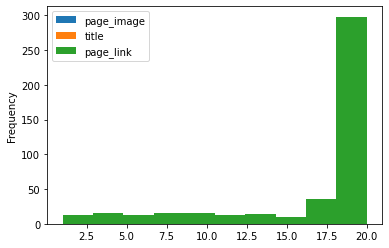

In [149]:
check.groupby('name').count().plot.hist()

In [ ]:
check

,name,page_image,title,page_link
0,참교육,https://shared-comic.pstatic.net/thumb/webtoon...,37화,https://comic.naver.com/webtoon/detail?titleId...
1,참교육,https://shared-comic.pstatic.net/thumb/webtoon...,38화,https://comic.naver.com/webtoon/detail?titleId...
2,참교육,https://shared-comic.pstatic.net/thumb/webtoon...,39화,https://comic.naver.com/webtoon/detail?titleId...
3,참교육,https://shared-comic.pstatic.net/thumb/webtoon...,40화,https://comic.naver.com/webtoon/detail?titleId...
4,참교육,https://shared-comic.pstatic.net/thumb/webtoon...,41화,https://comic.naver.com/webtoon/detail?titleId...
...,...,...,...,...
10006,합격시켜주세용,https://shared-comic.pstatic.net/thumb/webtoon...,6화,https://comic.naver.com/webtoon/detail?titleId...
10007,합격시켜주세용,https://shared-comic.pstatic.net/thumb/webtoon...,7화,https://comic.naver.com/webtoon/detail?titleId...
10008,합격시켜주세용,https://shared-comic.pstatic.net/thumb/webtoon...,8화,https://comic.naver.com/webtoon/detail?titleId...
10009,합격시켜주세용,https://shared-comic.pstatic.net/thumb/webtoon...,9화,https://comic.naver.com/webtoon/detail?titleId...


In [150]:
dff = list(set(before)- set(after))

In [153]:
dff

[]